In [31]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("data/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [18]:
categorical = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
df[categorical] = df[categorical].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    int64   
 1   Sex             918 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    int64   
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    int64   
dtypes: category(5), float64(1), int64(6)
memory usage: 55.5 KB


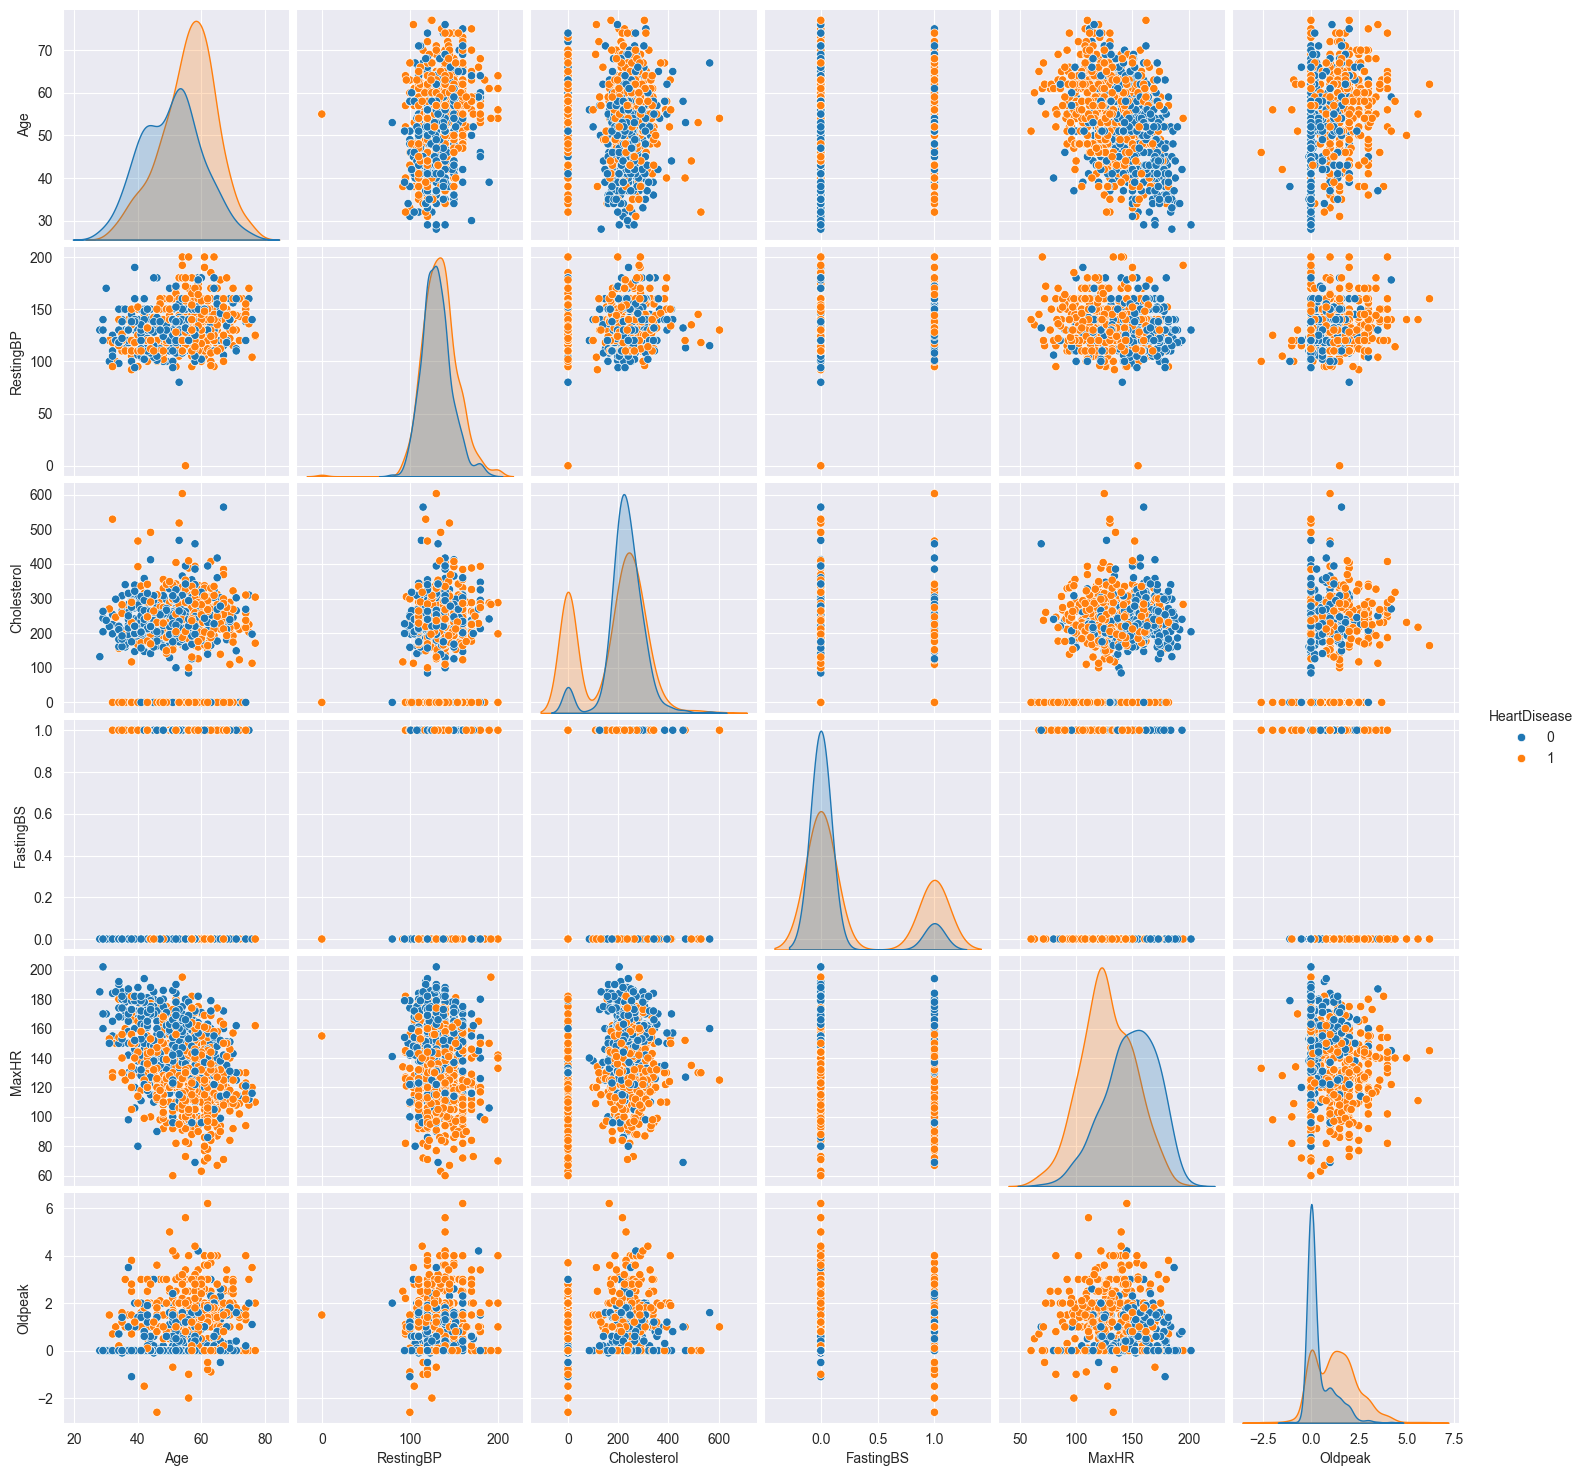

In [28]:
sns.pairplot(df, hue="HeartDisease")

# Numerical to Numerical

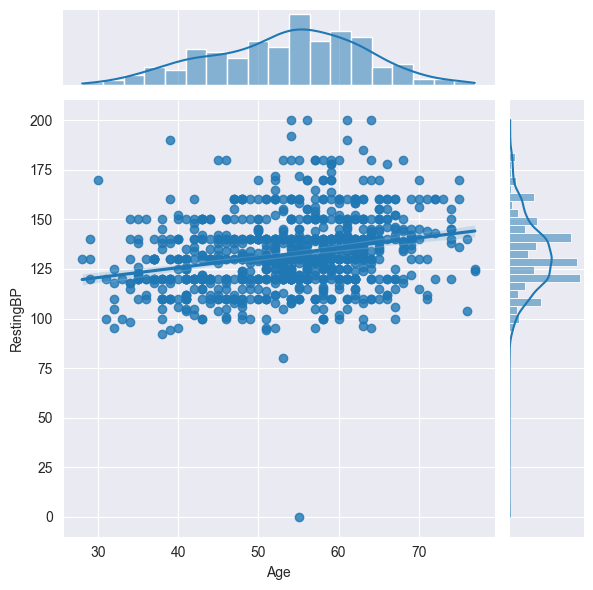

In [59]:
sns.jointplot(data=df, x="Age", y="RestingBP", kind="reg")

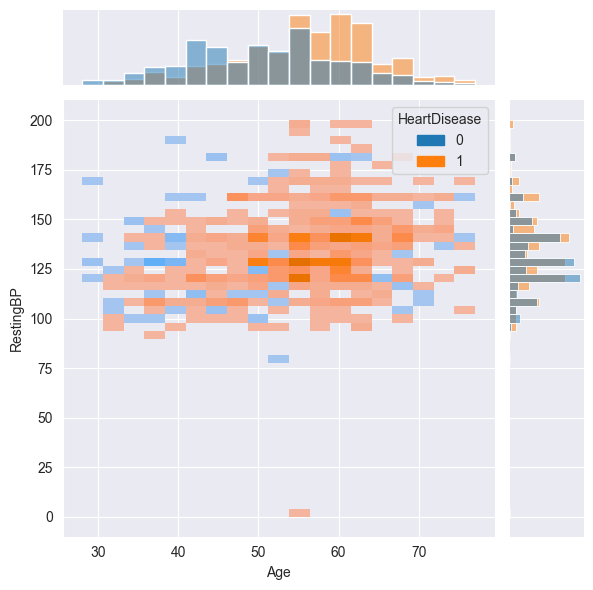

In [61]:
sns.jointplot(data=df, x="Age", y="RestingBP", kind="hist", hue="HeartDisease")

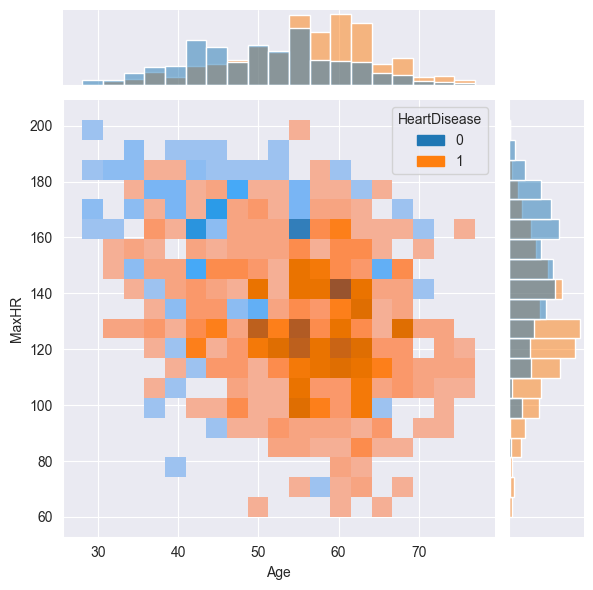

In [63]:
sns.jointplot(data=df, x="Age", y="MaxHR", kind="hist", hue="HeartDisease")

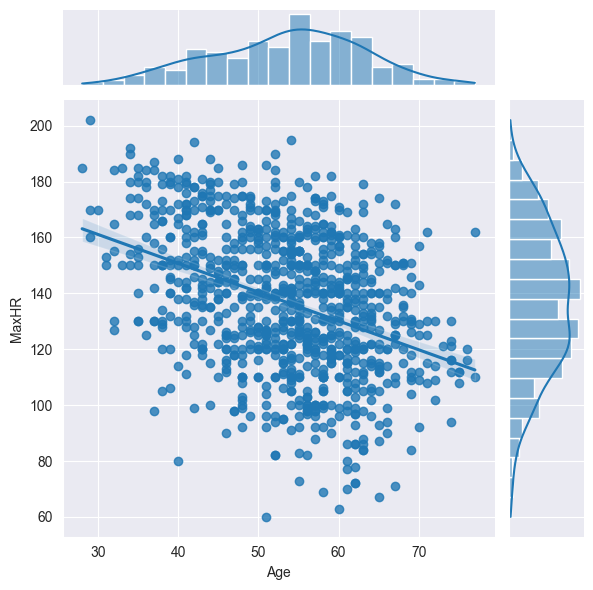

In [65]:
sns.jointplot(data=df, x="Age", y="MaxHR", kind="reg")

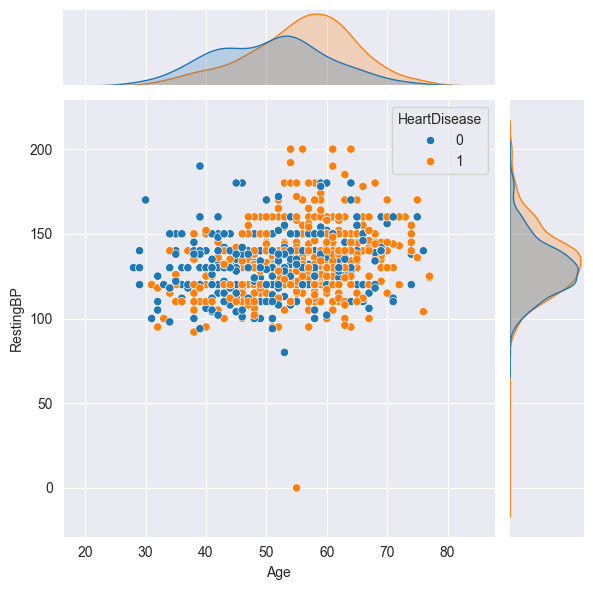

In [62]:
sns.jointplot(data=df, x="Age", y="RestingBP", kind="scatter", hue="HeartDisease")

In [22]:
df.drop(columns=categorical).corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


# Numerical to Categorical

<Axes: xlabel='Sex', ylabel='Age'>

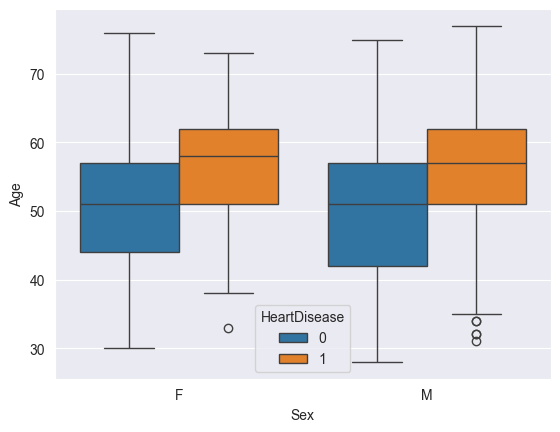

In [76]:
sns.boxplot(df, y="Age", x="Sex", hue="HeartDisease")

<Axes: xlabel='Age', ylabel='Count'>

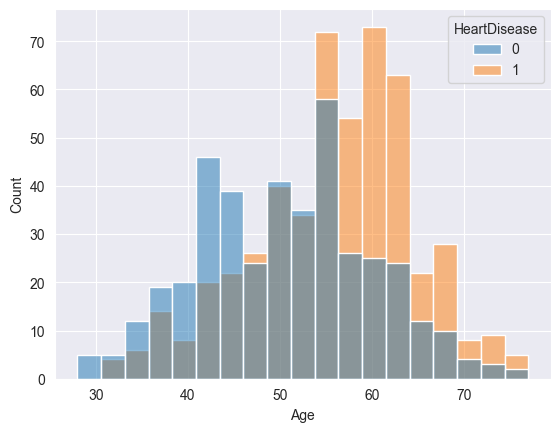

In [48]:
sns.histplot(df, x="Age", hue="HeartDisease")

<Axes: xlabel='ChestPainType', ylabel='count'>

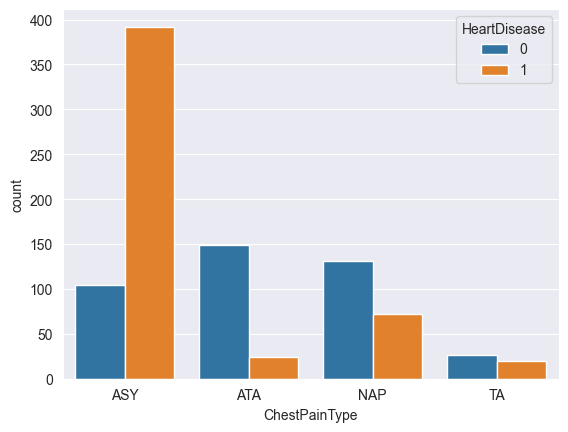

In [43]:
sns.countplot(df, x="ChestPainType", hue="HeartDisease")

<Axes: ylabel='Age'>

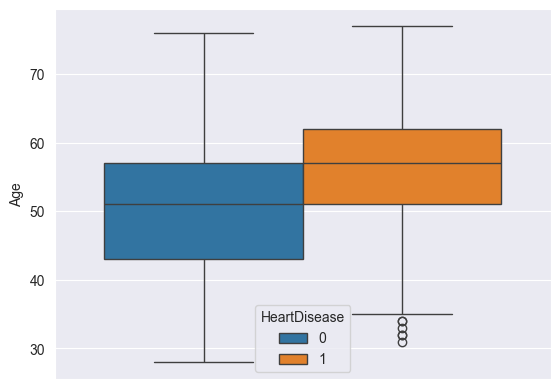

In [70]:
sns.boxplot(df, y="Age", hue="HeartDisease")

<Axes: ylabel='RestingBP'>

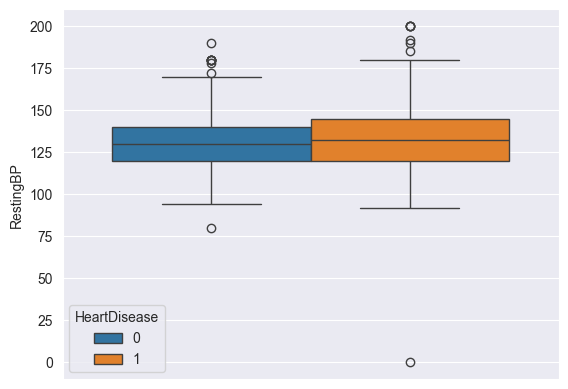

In [77]:
sns.boxplot(df, y="RestingBP", hue="HeartDisease")

<Axes: ylabel='Age'>

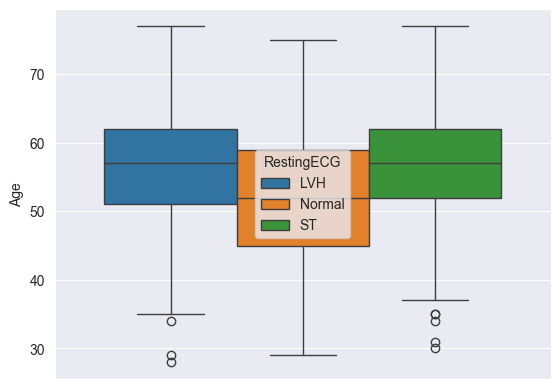

In [79]:
sns.boxplot(df, y="Age", hue="RestingECG")

# Categorical to Categorical

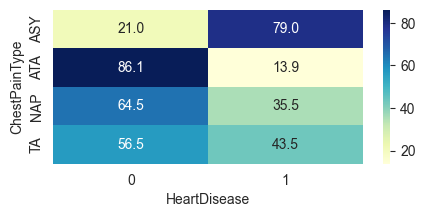

<Axes: xlabel='HeartDisease', ylabel='ChestPainType'>

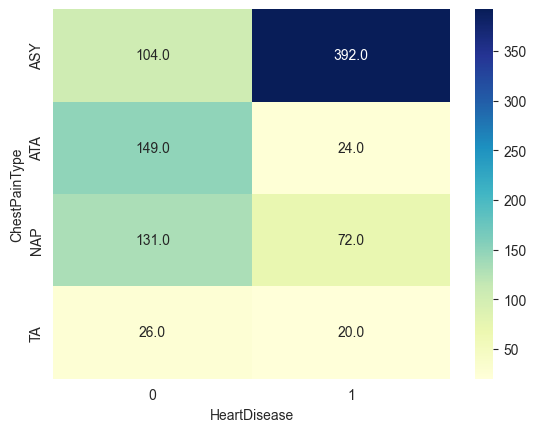

In [83]:
plt.figure(figsize=(5, 2)) 
cross_tab = pd.crosstab(df["ChestPainType"], df["HeartDisease"], normalize="index") * 100
sns.heatmap(cross_tab, annot=True, fmt=".1f", cmap="YlGnBu")
plt.show()
cross_tab = pd.crosstab(df["ChestPainType"], df["HeartDisease"]) 
sns.heatmap(cross_tab, annot=True, fmt=".1f", cmap="YlGnBu")


<Axes: xlabel='ST_Slope', ylabel='ChestPainType'>

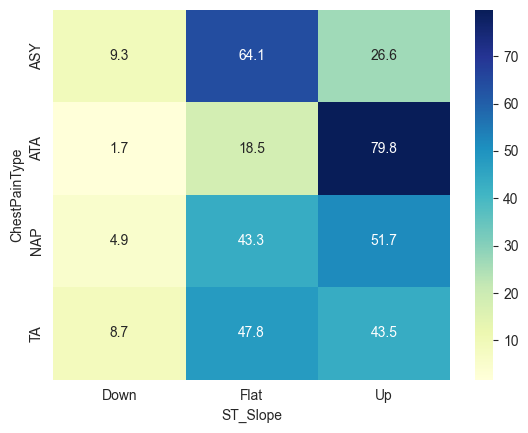

In [82]:
cross_tab = pd.crosstab(df["ChestPainType"], df["ST_Slope"], normalize="index") * 100
sns.heatmap(cross_tab, annot=True, fmt=".1f", cmap="YlGnBu")
